# 機械学習の基本の流れ（決定木モデル）

In [1]:
import pandas as pd

# データの読み込み
df = pd.read_csv('ex2.csv')

In [2]:
# 前処理　欠損値を調べる
df.isnull().sum()

x0        0
x1        1
x2        1
x3        0
target    0
dtype: int64

In [3]:
# 各列の中央値を欠損値に代入
tmp = df.median()
df2 = df.fillna(tmp)

In [5]:
# 特徴量と教師データに分け
a = ['x0','x1','x2','x3']
x = df2[a] # 特徴量
t = df2['target'] # 教師データ

In [6]:
# 訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.8, random_state = 0)

In [7]:
from sklearn import tree
# モデルの作成
model = tree.DecisionTreeClassifier(max_depth = 3, random_state=0)

In [8]:
# モデルに学習させる
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [9]:
# モデルの学習スコア（的中率）
model.score(x_test,y_test)

0.975

[Text(167.4, 163.07999999999998, 'x1 <= -0.36\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]')]

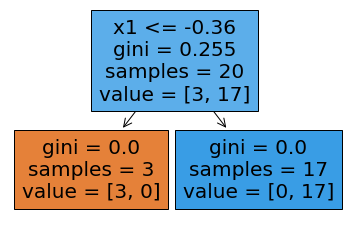

In [22]:
# 描画
from sklearn.tree import plot_tree
# plot_tree関数で決定木を描画
plot_tree(model, feature_names = x_train.columns, filled = True)